In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:

df_train = pd.read_csv("training_data.csv")


In [3]:
df_train.head(5)

,name,ico_score,platform,kyc,whitelist,category,type,mvp,location,kyc_passed,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,0xcert,9,1,1,1,5,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,abulaba,4,1,0,1,26,2,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aditus,5,1,0,0,8,1,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,adshares,4,1,0,0,21,1,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aeron,6,1,0,0,15,1,0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv("testing_data.csv")

In [5]:
df_train['Start'] = pd.to_datetime(df_train['Start'], errors='coerce')
df_train['End'] = pd.to_datetime(df_train['End'], errors='coerce')


In [6]:
df_train["Duration"]=df_train["End"]-df_train['Start']
df_train["first_funding"]=df_train["Start"].dt.year
df_train["last_funding"]=df_train["End"].dt.year


In [7]:
df_train["Raised"] = df_train["Raised"].fillna(2400000)


In [8]:
#df_test["Duration"] = df_test["Duration"].fillna(0)
#df_train["Duration"] = df_train["Duration"].fillna(0)

In [9]:
df_train.columns.values

array(['name', 'ico_score', 'platform', 'kyc', 'whitelist', 'category',
       'type', 'mvp', 'location', 'kyc_passed', 'Whitepaper', 'Website',
       'Video', 'Twitter', 'Reddit', 'Github', 'Facebook', 'Linkedin',
       'Instagram', 'Medium', 'Bitcointalk', 'Youtube', 'Total_socia.',
       'Raised', 'Start', 'End', 'data__finance__min_purchase',
       'data__finance__max_purchase', 'ROI_ico_1', 'ROI_ICO_7',
       'ROI_ICO_30', 'ROI_ICO_90', 'ROI_ICO_365', 'Day_1', 'Day_7',
       'Day_30', 'Day_90', 'Day_365', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Duration', 'first_funding',
       'last_funding'], dtype=object)

In [10]:
df_train["Raised"].tail(5)

240    2400000.0
241    3426450.0
242    7900000.0
243     250000.0
244    2994000.0
Name: Raised, dtype: float64

In [11]:
df_train["first_funding"] = pd.to_numeric(pd.to_datetime(df_train["first_funding"]))
df_train["last_funding"] = pd.to_numeric(pd.to_datetime(df_train["last_funding"]))
df_train["Duration"] = df_train["Duration"].dt.days


In [12]:
df_train["ROI_ICO_7"]

0      0
1      1
2      0
3      0
4      0
      ..
240    0
241    1
242    1
243    1
244    1
Name: ROI_ICO_7, Length: 245, dtype: int64

In [13]:
df_train.columns.values

array(['name', 'ico_score', 'platform', 'kyc', 'whitelist', 'category',
       'type', 'mvp', 'location', 'kyc_passed', 'Whitepaper', 'Website',
       'Video', 'Twitter', 'Reddit', 'Github', 'Facebook', 'Linkedin',
       'Instagram', 'Medium', 'Bitcointalk', 'Youtube', 'Total_socia.',
       'Raised', 'Start', 'End', 'data__finance__min_purchase',
       'data__finance__max_purchase', 'ROI_ico_1', 'ROI_ICO_7',
       'ROI_ICO_30', 'ROI_ICO_90', 'ROI_ICO_365', 'Day_1', 'Day_7',
       'Day_30', 'Day_90', 'Day_365', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Duration', 'first_funding',
       'last_funding'], dtype=object)

In [462]:
n_train = df_train["Facebook"].count()
f = df_train[['ico_score', 'platform', 'kyc', 'whitelist', 'category',
       'type', 'mvp', 'location', 'kyc_passed', 'Whitepaper', 'Website',
       'Video', 'Twitter', 'Reddit', 'Github', 'Facebook', 'Linkedin',
       'Instagram', 'Medium', 'Bitcointalk', 'Youtube', 'Total_socia.',
       'Raised', 'data__finance__min_purchase',
       'data__finance__max_purchase']].values.reshape(-1,25)
X = pd.DataFrame(f)
Y = df_train["Day_365"]

In [497]:
n_train = df_train["Facebook"].count()
f = df_train[["category", "location", "Raised", "ico_score", "Facebook", "Github", "Medium"
]].values.reshape(-1,7)
X = pd.DataFrame(f)
Y = df_train["ROI_ico_1"]

In [498]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=151,
                                                    train_size=0.9)

print(f'   Train   Test   Total')
print(f'X: {x_train.shape[0]}  + {x_test.shape[0]}  = {x_train.shape[0]}')
print(f'y: {y_train.shape[0]}  + {y_test.shape[0]}  = {y_train.shape[0]}')

   Train   Test   Total
X: 220  + 25  = 220
y: 220  + 25  = 220


In [499]:
model = RandomForestClassifier(n_jobs = 4)

model

RandomForestClassifier(n_jobs=4)

In [500]:
model = model.fit(x_train, y_train)


In [501]:
y_pred =model.predict(x_test)


In [502]:
model.score(x_test, y_test)

0.44

In [503]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, Y, cv=5).mean()

0.5469387755102041

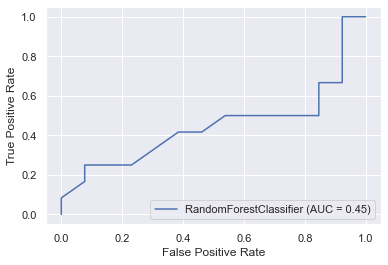

In [504]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(model, x_test, y_test)  
plt.show()       


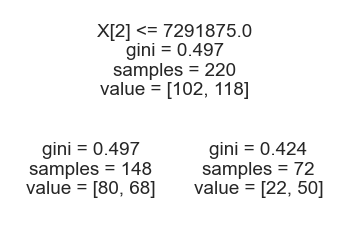

In [518]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
clf.fit(x_train, y_train)

tree.plot_tree(clf);


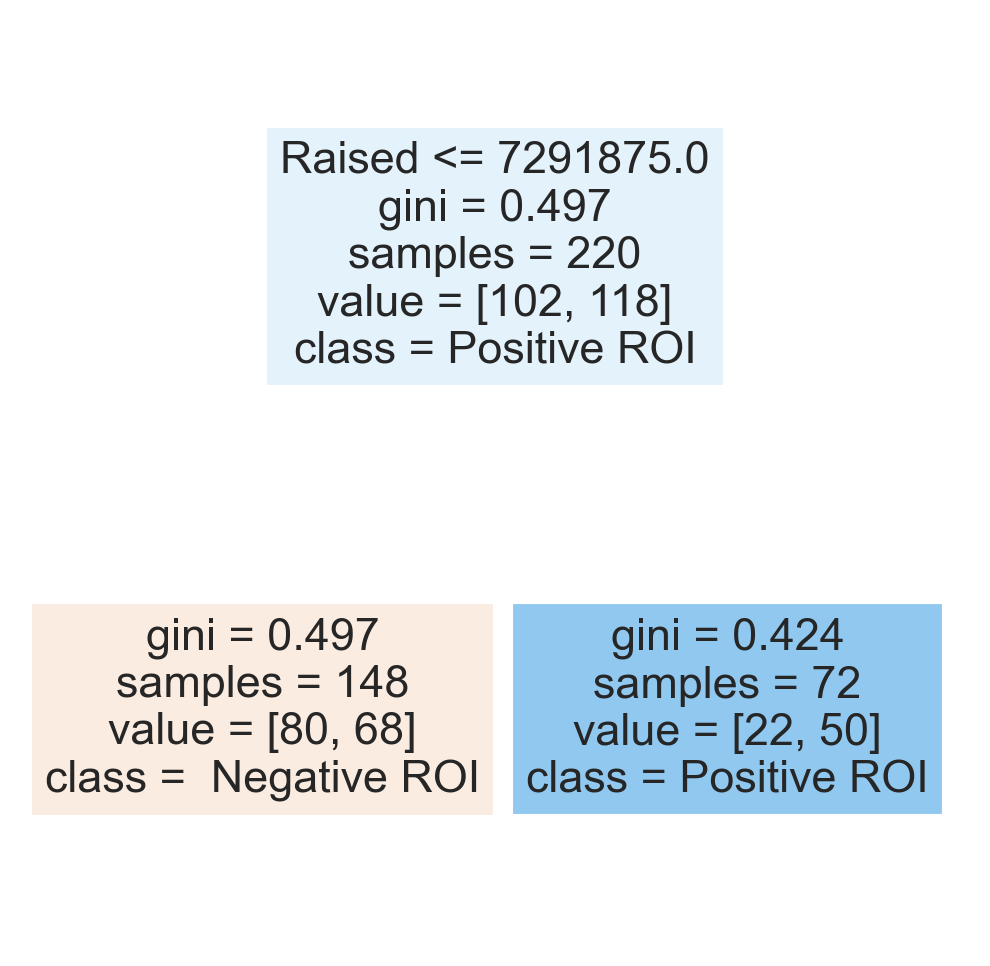

In [519]:
fn = ["category", "location", "Raised", "ico_score", "Facebook", "Github", "Medium"]
cn=[" Negative ROI", "Positive ROI"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names= cn,
               filled = True);
fig.savefig('decision_tree_ico.png')

In [453]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [13,  0]])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, Y, cv=5).mean()


0.5959183673469387

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
sfm = SelectFromModel(model, threshold=0.1)
sfm.fit(x_train, y_train)



SelectFromModel(estimator=RandomForestClassifier(n_jobs=4), threshold=0.1)

In [24]:
for feature in zip(feature_names, model.feature_importances_):
    print(feature)

NameError: name 'feature_names' is not defined

In [ ]:
for feature_list_index in sfm.get_support(indices=True):
    print(feature_names[feature_list_index])

In [25]:
accuracy_score(y_test, y_pred)

0.6612903225806451

In [456]:
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

In [457]:
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=4)
clf_important.fit(X_important_train, y_train)
y_important_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)

KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [459]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

Elapsed time to compute the importances: 0.018 seconds


In [460]:
forest_importances

Total_socia.    0.237359
Raised          0.762641
dtype: float64

In [463]:
feature_names = ('ico_score', 'platform', 'kyc', 'whitelist', 'category',
       'type', 'mvp', 'location', 'kyc_passed', 'Whitepaper', 'Website',
       'Video', 'Twitter', 'Reddit', 'Github', 'Facebook', 'Linkedin',
       'Instagram', 'Medium', 'Bitcointalk', 'Youtube', 'Total_socia.',
       'Raised', 'data__finance__min_purchase',
       'data__finance__max_purchase')

In [441]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=4)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.317 seconds


ValueError: The lengths of the data (2) and the error 4 do not match

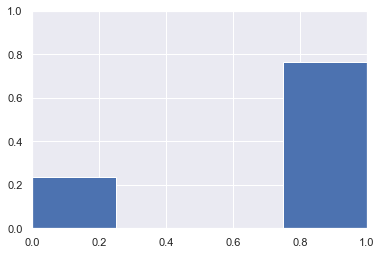

In [461]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [462]:
forest_importances

Total_socia.    0.237359
Raised          0.762641
dtype: float64